# Agregación de datos por categorías

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Generar dummy dataframe
gender = ["Female", "Male"]
income = ["Poor", "Middle Class", "Rich"]

In [3]:
n = 500
gender_data = []
income_data = []

for i in range(0, n):
    gender_data.append(np.random.choice(gender))
    income_data.append(np.random.choice(income))

In [4]:
# N(mu, ds) -> mu + ds * s
height = 160 + 30 * np.random.randn(n)
weight = 65 + 35 * np.random.randn(n)
age = 30 + 12 * np.random.randn(n)
inc = 18000 + 3500 * np.random.randn(n) 

In [5]:
data = pd.DataFrame({
    'Gender': gender_data,
    'Economic Status': income_data,
    'Height': height,
    'Weight': weight,
    'Age': age,
    'Income': inc,
})

In [6]:
data.head()

,Gender,Economic Status,Height,Weight,Age,Income
0,Male,Poor,151.925411,51.753643,21.659845,17394.586994
1,Female,Poor,172.172262,59.124034,21.289299,14222.228395
2,Female,Poor,195.550860,71.795039,24.023287,17235.016078
3,Female,Rich,137.978102,66.892633,19.854969,20543.891902
4,Male,Middle Class,184.118949,123.737136,38.256422,18830.732369


## Agrupación de datos

In [7]:
grouped_gender = data.groupby("Gender")

In [8]:
grouped_gender.groups

{'Female': [1, 2, 3, 6, 9, 11, 12, 13, 14, 17, 18, 21, 22, 23, 26, 30, 31, 35, 38, 41, 42, 44, 46, 52, 57, 61, 62, 63, 64, 65, 66, 68, 70, 72, 74, 75, 76, 77, 78, 81, 83, 88, 89, 90, 91, 92, 96, 97, 99, 102, 103, 105, 106, 107, 108, 110, 112, 114, 115, 116, 118, 120, 121, 122, 125, 129, 130, 131, 132, 139, 140, 145, 146, 147, 148, 149, 150, 151, 152, 155, 156, 157, 159, 160, 165, 166, 167, 168, 172, 174, 176, 178, 180, 182, 183, 185, 186, 187, 188, 190, ...], 'Male': [0, 4, 5, 7, 8, 10, 15, 16, 19, 20, 24, 25, 27, 28, 29, 32, 33, 34, 36, 37, 39, 40, 43, 45, 47, 48, 49, 50, 51, 53, 54, 55, 56, 58, 59, 60, 67, 69, 71, 73, 79, 80, 82, 84, 85, 86, 87, 93, 94, 95, 98, 100, 101, 104, 109, 111, 113, 117, 119, 123, 124, 126, 127, 128, 133, 134, 135, 136, 137, 138, 141, 142, 143, 144, 153, 154, 158, 161, 162, 163, 164, 169, 170, 171, 173, 175, 177, 179, 181, 184, 189, 191, 196, 198, 201, 202, 205, 206, 207, 208, ...]}

In [9]:
for names, groups in grouped_gender:
    print(names)
    print(groups)

Female
     Gender Economic Status      Height     Weight        Age        Income
1    Female            Poor  172.172262  59.124034  21.289299  14222.228395
2    Female            Poor  195.550860  71.795039  24.023287  17235.016078
3    Female            Rich  137.978102  66.892633  19.854969  20543.891902
6    Female            Rich  170.561875  45.445716  32.503051  19213.707858
9    Female            Poor  152.297334  50.785285  26.603147  15954.929377
..      ...             ...         ...        ...        ...           ...
491  Female            Poor  176.582064  34.470408  29.333893  16770.067401
493  Female            Poor  109.329261  63.648603  58.722986  11711.958732
494  Female            Rich   96.527077  18.548015  32.938517  18889.060179
495  Female            Poor  149.356867  49.513078  31.741471  19936.926409
497  Female            Rich  132.708002  56.468968  22.246393  15290.744640

[264 rows x 6 columns]
Male
    Gender Economic Status      Height      Weight  

In [10]:
grouped_gender.get_group("Female")

,Gender,Economic Status,Height,Weight,Age,Income
1,Female,Poor,172.172262,59.124034,21.289299,14222.228395
2,Female,Poor,195.550860,71.795039,24.023287,17235.016078
3,Female,Rich,137.978102,66.892633,19.854969,20543.891902
6,Female,Rich,170.561875,45.445716,32.503051,19213.707858
9,Female,Poor,152.297334,50.785285,26.603147,15954.929377
...,...,...,...,...,...,...
491,Female,Poor,176.582064,34.470408,29.333893,16770.067401
493,Female,Poor,109.329261,63.648603,58.722986,11711.958732
494,Female,Rich,96.527077,18.548015,32.938517,18889.060179
495,Female,Poor,149.356867,49.513078,31.741471,19936.926409


In [11]:
double_group = data.groupby(["Gender", "Economic Status"])

In [12]:
len(double_group)

6

In [13]:
for names, groups in double_group:
    print(names)
    print(groups)

('Female', 'Middle Class')
     Gender Economic Status      Height      Weight        Age        Income
12   Female    Middle Class  154.480058   14.298895  46.840224  21022.435724
14   Female    Middle Class  142.451720   63.952626  15.834041  22245.225758
38   Female    Middle Class  131.877459   38.788875   5.624690  20745.401853
42   Female    Middle Class  210.272390   21.265299  28.148394  18512.917782
44   Female    Middle Class  236.908074   99.900332  15.236049  13188.304248
..      ...             ...         ...         ...        ...           ...
454  Female    Middle Class  146.620355  106.232091  47.412934  11574.825468
455  Female    Middle Class  157.249992    3.746424  50.189596  23796.941366
468  Female    Middle Class  174.421621   77.146826  21.024758  16395.700981
472  Female    Middle Class  127.173944    0.315375  47.432478  25576.020510
473  Female    Middle Class  138.253454   23.006238  32.732201  20351.972530

[77 rows x 6 columns]
('Female', 'Poor')
     Ge

## Operaciones sobre datos agrupados

In [14]:
double_group.sum()

Height       Weight          Age        Income
Gender Economic Status                                                      
Female Middle Class     12691.982126  4028.921274  2350.551394  1.412400e+06
       Poor             15336.230321  5897.006415  2926.326135  1.762470e+06
       Rich             14428.151491  6022.415985  2753.198712  1.571664e+06
Male   Middle Class     14211.829905  5650.619877  2523.989788  1.608231e+06
       Poor             13866.559555  5693.392245  2561.542498  1.592654e+06
       Rich              9594.997709  3789.165911  1731.994082  1.093459e+06

In [15]:
double_group.mean()

Height     Weight        Age        Income
Gender Economic Status                                                
Female Middle Class     164.830937  52.323653  30.526641  18342.854180
       Poor             154.911417  59.565721  29.558850  17802.729878
       Rich             163.956267  68.436545  31.286349  17859.820549
Male   Middle Class     159.683482  63.490111  28.359436  18070.011312
       Poor             159.385742  65.441290  29.443017  18306.363422
       Rich             159.916628  63.152765  28.866568  18224.311371

In [16]:
double_group.size()

Gender  Economic Status
Female  Middle Class       77
        Poor               99
        Rich               88
Male    Middle Class       89
        Poor               87
        Rich               60
dtype: int64

In [17]:
double_group.describe()

Height                                                 \
                        count        mean        std         min         25%   
Gender Economic Status                                                         
Female Middle Class      77.0  164.830937  31.492426  100.975528  142.451720   
       Poor              99.0  154.911417  26.825184   88.445720  135.844162   
       Rich              88.0  163.956267  28.718997   96.527077  143.520197   
Male   Middle Class      89.0  159.683482  28.187261  101.367258  141.334212   
       Poor              87.0  159.385742  28.718925   92.979886  137.219132   
       Rich              60.0  159.916628  30.772944   76.151141  138.436173   

                                                           Weight             \
                               50%         75%         max  count       mean   
Gender Economic Status                                                         
Female Middle Class     165.197346  183.268055  237.503889   77.0  52.323653   
       Poor             155.993857  174.395505  209.364864   99.0  59.565721   
       Rich             164.493785  182.321052  234.378181   88.0  68.436545   
Male   Middle Class     159.641364  175.380392  227.691312   89.0  63.490111   
       Poor             157.505930  178.976114  237.295013   87.0  65.441290   
       Rich             159.850531  178.777973  219.505216   60.0  63.152765   

                        ...        Age            Income                \
                        ...        75%        max  count          mean   
Gender Economic Status  ...                                              
Female Middle Class     ...  38.328817  65.343985   77.0  18342.854180   
       Poor             ...  36.840597  58.722986   99.0  17802.729878   
       Rich             ...  37.619479  64.489595   88.0  17859.820549   
Male   Middle Class     ...  36.250193  53.051385   89.0  18070.011312   
       Poor             ...  35.963684  59.896616   87.0  18306.363422   
       Rich             ...  37.185822  53.395075   60.0  18224.311371   

                                                                               \
                                std           min           25%           50%   
Gender Economic Status                                                          
Female Middle Class     3540.773544  11574.825468  15792.019719  18332.877455   
       Poor             3455.309941  10885.050755  15125.704783  17624.271795   
       Rich             3651.459544   9220.391787  15581.815805  17801.748268   
Male   Middle Class     3420.139016   8202.295909  16216.159181  18014.562960   
       Poor             3384.343577  10961.088978  16137.261409  18269.668775   
       Rich             4032.148973   9169.965636  15825.511340  17660.774952   

                                                    
                                 75%           max  
Gender Economic Status                              
Female Middle Class     20436.001015  26878.034379  
       Poor             20019.852117  25249.541311  
       Rich             20291.424484  27652.423059  
Male   Middle Class     20187.752091  26673.810669  
       Poor             20718.452750  25361.399891  
       Rich             20020.168123  29664.545701  

[6 rows x 32 columns]

In [18]:
double_group.aggregate({
    "Income": np.sum,
    "Age": np.mean,
    "Height": np.std,
})

Income        Age     Height
Gender Economic Status                                    
Female Middle Class     1.412400e+06  30.526641  31.492426
       Poor             1.762470e+06  29.558850  26.825184
       Rich             1.571664e+06  31.286349  28.718997
Male   Middle Class     1.608231e+06  28.359436  28.187261
       Poor             1.592654e+06  29.443017  28.718925
       Rich             1.093459e+06  28.866568  30.772944

In [19]:
 double_group.aggregate({
     "Age": np.mean,
     "Height": lambda h: np.mean(h)/np.std(h),
 })

Age    Height
Gender Economic Status                     
Female Middle Class     30.526641  5.268308
       Poor             29.558850  5.804239
       Rich             31.286349  5.741700
Male   Middle Class     28.359436  5.697191
       Poor             29.443017  5.582024
       Rich             28.866568  5.240518

In [20]:
double_group.aggregate([np.sum, np.mean, np.std])

Height                              Weight  \
                                 sum        mean        std          sum   
Gender Economic Status                                                     
Female Middle Class     12691.982126  164.830937  31.492426  4028.921274   
       Poor             15336.230321  154.911417  26.825184  5897.006415   
       Rich             14428.151491  163.956267  28.718997  6022.415985   
Male   Middle Class     14211.829905  159.683482  28.187261  5650.619877   
       Poor             13866.559555  159.385742  28.718925  5693.392245   
       Rich              9594.997709  159.916628  30.772944  3789.165911   

                                                      Age             \
                             mean        std          sum       mean   
Gender Economic Status                                                 
Female Middle Class     52.323653  33.823563  2350.551394  30.526641   
       Poor             59.565721  31.882451  2926.326135  29.558850   
       Rich             68.436545  35.428742  2753.198712  31.286349   
Male   Middle Class     63.490111  36.938012  2523.989788  28.359436   
       Poor             65.441290  38.063248  2561.542498  29.443017   
       Rich             63.152765  34.355042  1731.994082  28.866568   

                                         Income                             
                              std           sum          mean          std  
Gender Economic Status                                                      
Female Middle Class     12.769149  1.412400e+06  18342.854180  3540.773544  
       Poor             11.607534  1.762470e+06  17802.729878  3455.309941  
       Rich             11.740057  1.571664e+06  17859.820549  3651.459544  
Male   Middle Class     10.841442  1.608231e+06  18070.011312  3420.139016  
       Poor             10.775932  1.592654e+06  18306.363422  3384.343577  
       Rich             12.360305  1.093459e+06  18224.311371  4032.148973

In [21]:
double_group.aggregate([lambda x: np.mean(x)/np.std(x)])

Height    Weight       Age    Income
                        <lambda>  <lambda>  <lambda>  <lambda>
Gender Economic Status                                        
Female Middle Class     5.268308  1.557103  2.406332  5.214436
       Poor             5.804239  1.877800  2.559482  5.178502
       Rich             5.741700  1.942737  2.680195  4.919175
Male   Middle Class     5.697191  1.728567  2.630657  5.313349
       Poor             5.582024  1.729245  2.748134  5.440490
       Rich             5.240518  1.853751  2.355134  4.557894

## Filtrado de datos

In [22]:
double_group.sum()

Height       Weight          Age        Income
Gender Economic Status                                                      
Female Middle Class     12691.982126  4028.921274  2350.551394  1.412400e+06
       Poor             15336.230321  5897.006415  2926.326135  1.762470e+06
       Rich             14428.151491  6022.415985  2753.198712  1.571664e+06
Male   Middle Class     14211.829905  5650.619877  2523.989788  1.608231e+06
       Poor             13866.559555  5693.392245  2561.542498  1.592654e+06
       Rich              9594.997709  3789.165911  1731.994082  1.093459e+06

In [23]:
# sum > 2400
double_group["Age"].filter(lambda x: x.sum()>2400)

0      21.659845
1      21.289299
2      24.023287
3      19.854969
4      38.256422
         ...    
493    58.722986
494    32.938517
495    31.741471
497    22.246393
498    24.822777
Name: Age, Length: 363, dtype: float64

## Transformación de variables

In [25]:
zscore = lambda x: (x - x.mean())/x.std()

In [27]:
z_group = double_group.transform(zscore)

In [28]:
import matplotlib.pyplot as plt

(array([  3.,   8.,  24.,  57., 110., 120., 100.,  55.,  14.,   9.]),
 array([-3.28116244, -2.67022605, -2.05928967, -1.44835329, -0.8374169 ,
        -0.22648052,  0.38445586,  0.99539224,  1.60632863,  2.21726501,
         2.82820139]),
 <BarContainer object of 10 artists>)

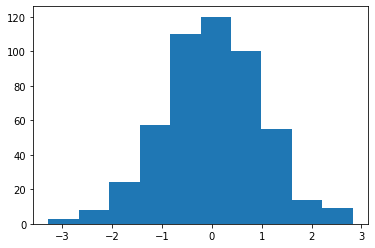

In [29]:
plt.hist(z_group["Age"])

In [32]:
# Reemplazar NA
fill_na_mean = lambda x: x.fillna(x.mean())

In [33]:
double_group.transform(fill_na_mean)

,Height,Weight,Age,Income
0,151.925411,51.753643,21.659845,17394.586994
1,172.172262,59.124034,21.289299,14222.228395
2,195.550860,71.795039,24.023287,17235.016078
3,137.978102,66.892633,19.854969,20543.891902
4,184.118949,123.737136,38.256422,18830.732369
...,...,...,...,...
495,149.356867,49.513078,31.741471,19936.926409
496,136.559845,87.654929,44.215426,24932.910575
497,132.708002,56.468968,22.246393,15290.744640
498,172.638132,47.559445,24.822777,16854.570658


## Operaciones diversas utilizadas

In [34]:
# 1er fila de cada grupo
double_group.head(1)

,Gender,Economic Status,Height,Weight,Age,Income
0,Male,Poor,151.925411,51.753643,21.659845,17394.586994
1,Female,Poor,172.172262,59.124034,21.289299,14222.228395
3,Female,Rich,137.978102,66.892633,19.854969,20543.891902
4,Male,Middle Class,184.118949,123.737136,38.256422,18830.732369
8,Male,Rich,158.046010,5.888328,19.166475,14688.916112
12,Female,Middle Class,154.480058,14.298895,46.840224,21022.435724


In [35]:
# ultima fila de cada grupo
double_group.tail(1)

,Gender,Economic Status,Height,Weight,Age,Income
471,Male,Poor,237.295013,38.373584,18.008149,12163.446882
473,Female,Middle Class,138.253454,23.006238,32.732201,20351.972530
495,Female,Poor,149.356867,49.513078,31.741471,19936.926409
497,Female,Rich,132.708002,56.468968,22.246393,15290.744640
498,Male,Middle Class,172.638132,47.559445,24.822777,16854.570658
499,Male,Rich,152.391765,77.987734,32.363427,17667.059968


In [36]:
# Fila n-esima
double_group.nth(32)

Height      Weight        Age        Income
Gender Economic Status                                                 
Female Middle Class     163.752775   28.054734  50.097642  23123.072141
       Poor             165.685976   56.252258  28.236660  16433.809835
       Rich             171.782494   21.203291  27.954835  20987.647166
Male   Middle Class     213.031724  135.384491  21.119533  13177.998969
       Poor             193.262506  104.344886  29.752169  13103.235301
       Rich             160.753267  102.773528  25.184113  20409.178740

In [37]:
data_sorted = data.sort_values(["Age", "Income"])

In [40]:
data_sorted.head(10)

,Gender,Economic Status,Height,Weight,Age,Income
95,Male,Poor,156.461167,-4.238640,-5.914565,16471.908531
238,Female,Middle Class,136.660710,60.592761,-4.970547,19830.380749
80,Male,Middle Class,165.535906,120.102395,-2.933606,17031.877397
234,Male,Rich,153.091177,67.387385,-2.251808,29664.545701
298,Male,Rich,142.889636,86.932000,-0.127027,14308.946653
33,Male,Rich,180.983779,47.344957,1.574853,15847.806016
142,Male,Rich,91.391173,58.082210,1.635709,19464.003808
104,Male,Poor,145.791824,152.406823,2.563303,22233.105351
358,Female,Poor,146.467751,64.061509,2.857973,15698.834034
210,Female,Rich,178.697954,88.491648,3.118869,17503.072764


In [42]:
age_grouped = data_sorted.groupby("Gender")

In [44]:
age_grouped.head(1)

,Gender,Economic Status,Height,Weight,Age,Income
95,Male,Poor,156.461167,-4.238640,-5.914565,16471.908531
238,Female,Middle Class,136.660710,60.592761,-4.970547,19830.380749


In [45]:
age_grouped.tail(1)

,Gender,Economic Status,Height,Weight,Age,Income
316,Male,Poor,179.276641,-4.392435,59.896616,17358.304407
237,Female,Middle Class,172.669315,48.498594,65.343985,16286.969445


# Conjunto de entrenamiento y testing
* 80% de los datos para entrenamiento
* 20% de los datos para testing

In [46]:
data = pd.read_csv('python-ml-course-master/datasets/customer-churn-model/Customer Churn Model.txt')

In [47]:
len(data)

3333

## Dividir utilizando la Distribución Normal

In [48]:
a = np.random.randn(len(data))

(array([ 10.,  73., 289., 688., 880., 754., 461., 153.,  21.,   4.]),
 array([-3.34952413, -2.63492691, -1.92032969, -1.20573247, -0.49113526,
         0.22346196,  0.93805918,  1.6526564 ,  2.36725362,  3.08185084,
         3.79644806]),
 <BarContainer object of 10 artists>)

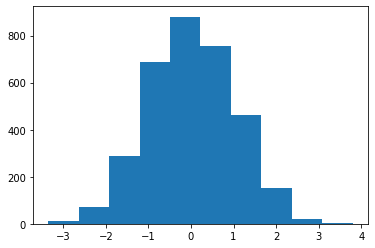

In [50]:
plt.hist(a)

In [55]:
check = (a<0.8)

(array([ 761.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2572.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

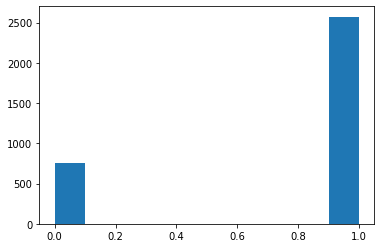

In [56]:
plt.hist(check.astype(int))

In [57]:
training = data[check]
testing = data[~check]

In [58]:
len(training)

2572

In [59]:
len(testing)

761

## Dividir utilizando la libreria sklearn

In [66]:
import sklearn
from sklearn.model_selection import train_test_split

In [61]:
train, test = train_test_split(data, test_size=0.2) # size = porcentaje de test

In [62]:
len(train)

2666

In [63]:
len(test)

667

## Dividir utilizando una función de shuffle

In [65]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [69]:
# Mezclar la filas aleatoriamente
data = sklearn.utils.shuffle(data)
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
2560,MN,61,415,409-8802,no,no,0,197.3,67,33.54,...,106,22.48,210.5,116,9.47,9.0,6,2.43,1,False.
1705,ID,24,408,341-9396,no,yes,29,236.3,105,40.17,...,114,16.22,129.0,105,5.81,7.2,2,1.94,3,False.
2279,OR,80,415,375-4900,no,no,0,113.2,86,19.24,...,97,15.77,237.3,145,10.68,9.5,5,2.57,1,False.
448,GA,75,415,333-7637,no,no,0,117.3,114,19.94,...,61,17.09,107.9,82,4.86,12.2,3,3.29,1,False.
2273,CT,48,415,419-6564,no,no,0,171.9,98,29.22,...,127,13.52,139.5,101,6.28,7.6,3,2.05,2,False.


In [77]:
cut_id = int(0.8*len(data))
train_data = data[:cut_id]
test_data = data[cut_id:]

In [78]:
len(train_data)

2666

In [79]:
len(test_data)

667